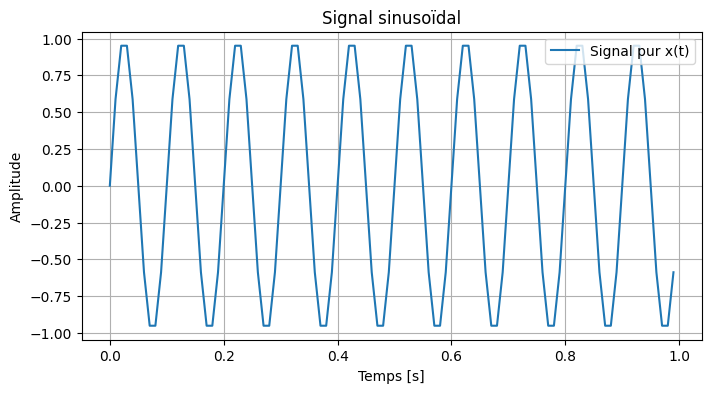

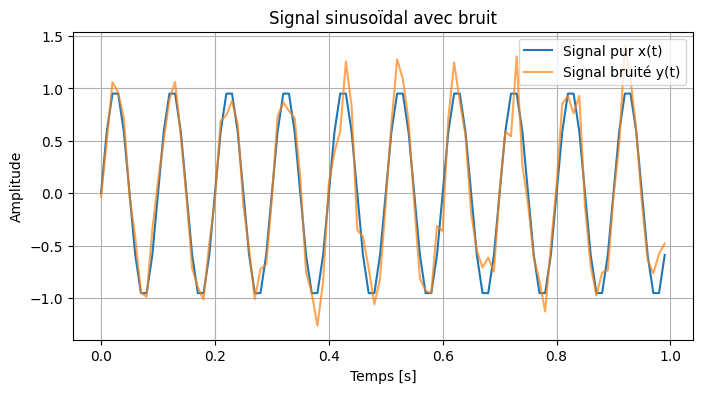

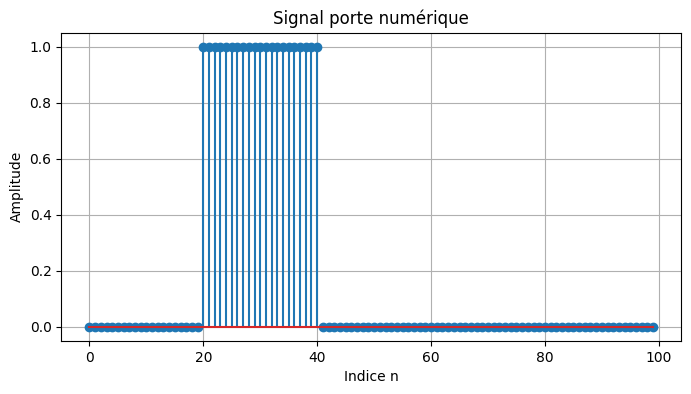

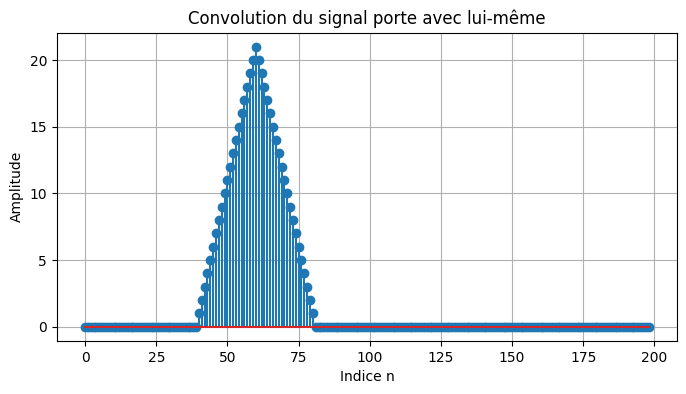

In [6]:
#tp1
import numpy as np
import matplotlib.pyplot as plt


A = 1
f0 = 10
phi = 0
fs = 100
T = 1

t = np.arange(0, T, 1/fs)


x = A * np.sin(2 * np.pi * f0 * t + phi)


plt.figure(figsize=(8,4))
plt.plot(t, x, label='Signal pur x(t)')
plt.title('Signal sinusoïdal')
plt.xlabel('Temps [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()




#2. Ajout de bruit et analyse


bruit = np.random.normal(0, 0.2, size=t.shape)


y = x + bruit


plt.figure(figsize=(8,4))
plt.plot(t, x, label='Signal pur x(t)')
plt.plot(t, y, label='Signal bruité y(t)', alpha=0.7)
plt.title('Signal sinusoïdal avec bruit')
plt.xlabel('Temps [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()



#Création d’un signal porte numérique
import numpy as np
import matplotlib.pyplot as plt

# 1. Création du signal porte
N = 100
n = np.arange(N)
rect = np.zeros(N)
rect[20:41] = 1

plt.figure(figsize=(8,4))
plt.stem(n, rect)
plt.title('Signal porte numérique')
plt.xlabel('Indice n')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# 2. Convolution du signal porte avec lui-même
conv_rect = np.convolve(rect, rect)
n_conv = np.arange(len(conv_rect))

plt.figure(figsize=(8,4))
plt.stem(n_conv, conv_rect)
plt.title('Convolution du signal porte avec lui-même')
plt.xlabel('Indice n')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Nouvelle section

# Nouvelle section

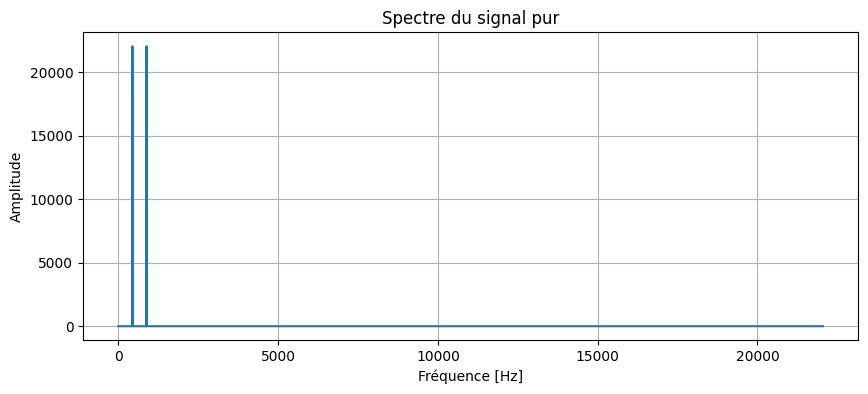

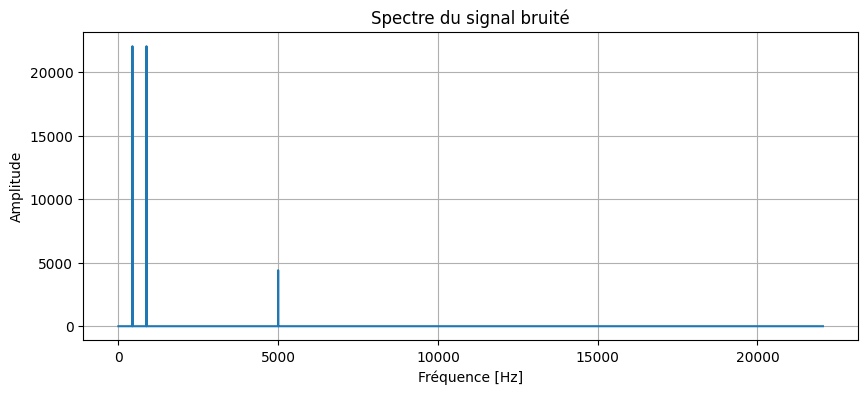

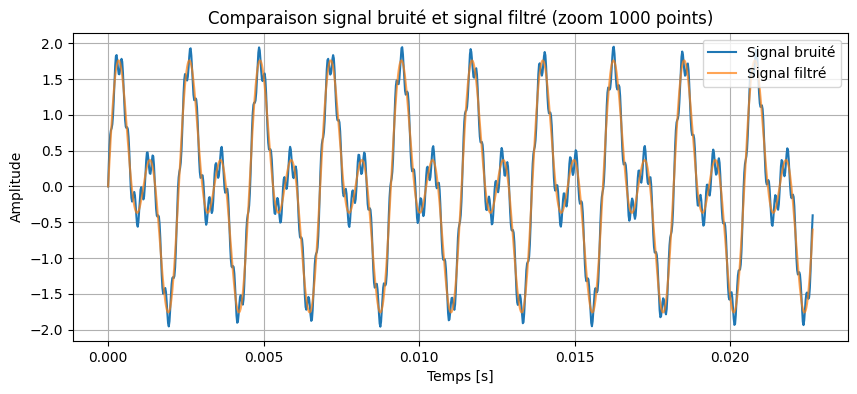

In [8]:
#tp2
import numpy as np
import matplotlib.pyplot as plt


fs = 44100
T = 1
t = np.arange(0, T, 1/fs)
f1 = 440
f2 = 880
A = 1

# Signal composé des deux fréquences
x = A * np.sin(2*np.pi*f1*t) + A * np.sin(2*np.pi*f2*t)

# FFT
X = np.fft.fft(x)
N = len(X)
freqs = np.fft.fftfreq(N, 1/fs)

# Tracé du module de la FFT (partie positive seulement)
plt.figure(figsize=(10,4))
plt.plot(freqs[:N//2], np.abs(X)[:N//2])
plt.title("Spectre du signal pur")
plt.xlabel("Fréquence [Hz]")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()


#2.2 Identification et filtrage d’un bruit
fbruit = 5000  # Hz
A_bruit = 0.2

# Signal bruité
x_bruit = x + A_bruit * np.sin(2*np.pi*fbruit*t)

# FFT du signal bruité
X_bruit = np.fft.fft(x_bruit)

plt.figure(figsize=(10,4))
plt.plot(freqs[:N//2], np.abs(X_bruit)[:N//2])
plt.title("Spectre du signal bruité")
plt.xlabel("Fréquence [Hz]")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()



#2. Filtrage en zéro dans la FFT (coupe-bande)


# Indices du bruit
fmin = 4900
fmax = 5100

# Copie de la FFT pour filtrage
X_filtree = X_bruit.copy()

# Filtrage des coefficients correspondant au bruit
indices_bruit = np.where((freqs >= fmin) & (freqs <= fmax))[0]
indices_bruit_neg = np.where((freqs <= -fmin) & (freqs >= -fmax))[0]
X_filtree[indices_bruit] = 0
X_filtree[indices_bruit_neg] = 0

# Reconstruction du signal filtré
x_filtree = np.fft.ifft(X_filtree).real

# Comparaison temporelle
plt.figure(figsize=(10,4))
plt.plot(t[:1000], x_bruit[:1000], label="Signal bruité")
plt.plot(t[:1000], x_filtree[:1000], label="Signal filtré", alpha=0.7)
plt.title("Comparaison signal bruité et signal filtré (zoom 1000 points)")
plt.xlabel("Temps [s]")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()


from IPython.display import Audio

Audio(x_bruit, rate=fs)      # écouter le signal bruité
Audio(x_filtree, rate=fs)    # écouter le signal filtré
plt.show()